## This codes defines a couple filters and creates a function for them which return the same array just filtered or downsampled. original code from Andrey, slightly modified with a new filter 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

root = 'C:/Users/Fabian/Desktop/Analysis/Multiple_trial_analysis/Data/Raw/'
figures = 'C:/Users/Fabian/Desktop/Analysis/Multiple_trial_analysis/Figures/'

Day86_fs2 = pd.read_csv(root+'position 20200128-160013.txt',sep=" ", header=None)
Day86_fs1 = pd.read_csv(root+'position 20200128-151826.txt',sep=" ", header=None)

beacon_Day86_fs2 = pd.read_csv(root+'beacons 20200128-160013.txt',sep=" ", header=None)
beacon_Day86_fs1 = pd.read_csv(root+'beacons 20200128-151826.txt',sep=" ", header=None)


## Andrey's code

In [2]:
from scipy import signal    


# init method or constructor
# def __init__(self,traj):
#     self.traj = Day86_fs1


def velocity(trajectory):
    """
    :return: Nx2 Matrix, d1 - time, d2 - speed
    """
    diffs = np.diff(trajectory, axis=0)

    dt = diffs[:, 0]
    dx = np.sqrt(np.square(diffs[:, 1]) + np.square(diffs[:, 2]))
    velocity=[]
    return np.column_stack((trajectory[:-1, 0], dx/dt))

def smoothed_velocity(self, ker_width=100):  # 2D array, uses self.velocity[:, 0] as time at 0th column
    # gaussian kernel
    kernel = signal.gaussian(ker_width + 1, std=(ker_width + 1) / 7.2)
    velocity = self.velocity

    cvd = np.convolve(velocity[:, 1], kernel, 'same') / kernel.sum()
    return np.column_stack((self.trajectory[:-1, 0], cvd))


def get_at_freq(traj, freq=4):  
    """
    traj - time / positions for a particular trial
    freq - same array sampled in <freq> in Hz
    """
    t_start = traj[0][0]

    result = []
    samples_to_create = int(round((traj[-1][0] - traj[0][0]) * freq))

    for ti in [t_start + x / float(freq) for x in range(samples_to_create)]:
        nearest_row = traj[np.abs(traj[:, 0] - ti).argmin()]
        result.append(nearest_row)

    return np.array(result)

### converting the original data : 

## Median filter.

In [3]:
k=velocity(np.array(Day86_fs1)) # get velocity from position data X and Y 
po5hz = signal.medfilt(k[:,1], 3) # median filter for the velocity column taking into account every near number hence 3 
median_filter = np.column_stack((k[:,0], po5hz)) #add time column to the smoother data. 
resamples_5_median_filter= get_at_freq(median_filter,freq=5) # now resmaple at 5 hz 

resamples_5_median_filter # giving an array in time and ressampled and smoothened velocity 

array([[1.58022118e+09, 6.50543136e-01],
       [1.58022119e+09, 1.13756399e-01],
       [1.58022119e+09, 1.51453727e-01],
       ...,
       [1.58022299e+09, 4.90413449e-02],
       [1.58022299e+09, 1.52470076e-01],
       [1.58022299e+09, 1.67278298e-02]])

### this makes the size of the array much smaller then before, as it is only 9000 and not 9000*5 

In [4]:
resamples_5_median_filter.shape

(9039, 2)

### Graph resampled data  # smothened velocities. 

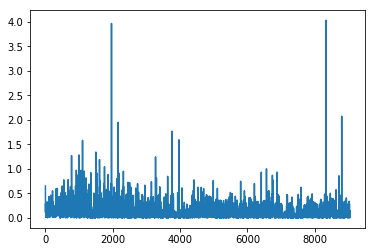

In [5]:
fig, ax = plt.subplots()
ax.plot(resamples_5_median_filter[:,1])
plt.show()

### Make function - take animal position data, resample at a given freg, then apply median filter and return smoothened and then resampled data


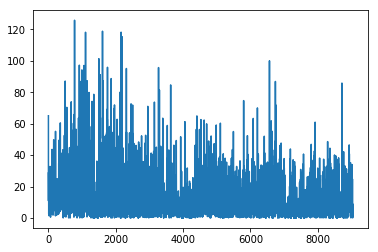

array([[1.58022118e+09, 6.50543136e-01],
       [1.58022119e+09, 1.08953619e-01],
       [1.58022119e+09, 1.51453727e-01],
       ...,
       [1.58022299e+09, 4.90413449e-02],
       [1.58022299e+09, 8.90084650e-02],
       [1.58022299e+09, 1.02035681e-02]])

In [6]:
def med_smoothen_resample_plot(position_data,freguency=5,med_filter=3):
    """
      take animal position data, resample at a given freg, 
      then apply median filter and return smoothened and then resampled data
    """
    fig, ax = plt.subplots()
    k=velocity(np.array(position_data)) # get velocity from position data X and Y 
    po5hz = signal.medfilt(k[:,1], med_filter) # median filter for the velocity column taking into account every near number hence 3 
    median_filter = np.column_stack((k[:,0], po5hz)) #add time column to the smoother data. 
    resamples_5_median_filter= get_at_freq(median_filter,freq=freguency) # now resmaple at 5 hz 

    ax.plot(100*resamples_5_median_filter[:,1])
    plt.show()
    return resamples_5_median_filter  # giving an array in time and ressampled and smoothened velocity 

med_smoothen_resample_plot(Day86_fs1,5,med_filter=5)
    

## Evaluations - likley the best to tun at 5 filter and resampled at 5 hz 

## TODO - create one making a gaussian filter function  DONE


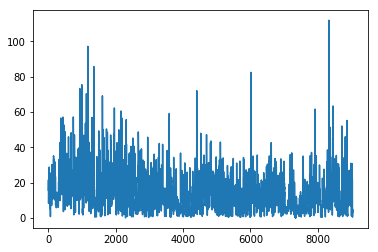

array([[1.58022118e+09, 6.50543136e-01],
       [1.58022119e+09, 1.13756399e-01],
       [1.58022119e+09, 1.51453727e-01],
       ...,
       [1.58022299e+09, 4.90413449e-02],
       [1.58022299e+09, 1.52470076e-01],
       [1.58022299e+09, 1.67278298e-02]])

In [7]:
def gau_smoothen_resample_plot(position_data,freguency=5,ker_width=100):
    """
      take animal position data, resample at a given freg, 
      then apply gaussian filter and return smoothened and then resampled data
    """
    fig, ax = plt.subplots()
    k=velocity(np.array(position_data))# get velocity from position data X and Y 
    
    kernel = signal.gaussian(ker_width + 1, std=(ker_width + 1) / 7.2)
    
    cvd = np.convolve(k[:, 1], kernel, 'same') / kernel.sum() # desribe the step
    resamples_gaus_filter = np.column_stack((k[:,0], cvd))   #add time column to the smoother data. 

    resamples_5_gaus_filter= get_at_freq(resamples_gaus_filter,freq=freguency) # now resmaple at 5 hz 

    ax.plot(100*resamples_5_gaus_filter[:,1])
    plt.show()
    return resamples_5_median_filter  # giving an array in time and ressampled and smoothened velocity 

gau_smoothen_resample_plot(Day86_fs1,freguency=5,ker_width=100)

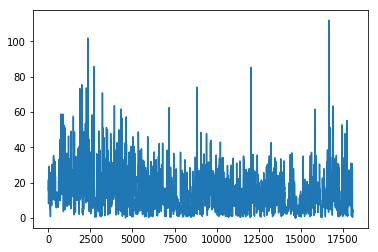

(9039, 2)

In [8]:
gau_smoothen_resample_plot(Day86_fs1,freguency=10,ker_width=100).shape

### What is better, a gaussian or a median filter? 

## It seems that Gaussian does not give large spikes - ker = 100, median at 5 is likley more precise?  

### 
2. graph after resampling. 
 need to resample the speeds, but still match with the time. 
need index to match with index of speeds. 
Need to find the nearest time to the index. 


In [11]:
def gau_smoothen_resample(position_data,freguency=5,ker_width=100):
    """
      take animal position data, resample at a given freg, 
      then apply gaussian filter and return smoothened and then resampled data
    """
    #fig, ax = plt.subplots()
    k=velocity(np.array(position_data))# get velocity from position data X and Y 
    
    kernel = signal.gaussian(ker_width + 1, std=(ker_width + 1) / 7.2)
    
    cvd = np.convolve(k[:, 1], kernel, 'same') / kernel.sum() # desribe the step
    resamples_gaus_filter = np.column_stack((k[:,0], cvd))   #add time column to the smoother data. 

    resamples_5_gaus_filter= get_at_freq(resamples_gaus_filter,freq=freguency) # now resmaple at 5 hz 

    #ax.plot(100*resamples_5_gaus_filter[:,1])
    #plt.show()
    return resamples_5_median_filter  # giving an array in time and ressampled and smoothened velocity 

gau_smoothen_resample(Day86_fs1,freguency=5,ker_width=100)

array([[1.58022118e+09, 6.50543136e-01],
       [1.58022119e+09, 1.13756399e-01],
       [1.58022119e+09, 1.51453727e-01],
       ...,
       [1.58022299e+09, 4.90413449e-02],
       [1.58022299e+09, 1.52470076e-01],
       [1.58022299e+09, 1.67278298e-02]])

### Graphing from IMshow folder 

In [88]:
    
array =  gau_smoothen_resample(Day86_fs1,freguency=10,ker_width=100)
    

In [89]:
array.shape

(9039, 2)

[35, 439, 489, 630, 668, 1012, 1049, 1587, 1925, 1943, 2906, 3060, 3139, 3162, 3281, 4364, 4417, 4527, 5095, 5198, 5372, 5416, 5462, 6186, 6221, 6241, 6414, 6631, 6729, 7803, 7912, 8312, 8548, 8745, 8792]


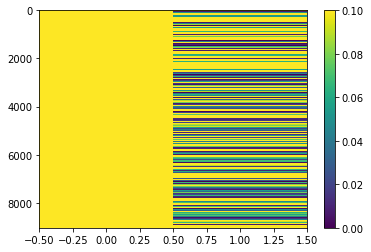

In [120]:
beacon_data = beacon_Day86_fs1
position_data = Day86_fs1
index = []
for i in list(np.arange(0,len(beacon_data [0]),1)):
    index.append(np.abs(np.array(beacon_data[0][i])-(array[:,0])).argmin())  
print (index)
    
fig, ax = plt.subplots()
im = ax.imshow(array, cmap=plt.get_cmap('viridis'),aspect='auto',vmin=0, vmax=.1,interpolation='nearest')
fig.colorbar(im)

In [121]:
plt.imshow?

In [122]:
for i in index: 
    print(array[:,1][i])
    print (i)

0.15004810640590513
35
0.0
439
0.08719175132385709
489
0.311954732902339
630
0.05037754073363871
668
0.02251671471020552
1012
0.015074448853021817
1049
0.07162956273046549
1587
0.2839310097104768
1925
0.08188857835600392
1943
0.005197962491828285
2906
0.01229496772362712
3060
0.02420587614466037
3139
0.13247535828881335
3162
0.33865286515934073
3281
0.18591289261570354
4364
0.39809802711950815
4417
0.01622513228601833
4527
0.10206135782432015
5095
0.05497056534846856
5198
0.00861000620059947
5372
0.16404599531374522
5416
0.06643604685511537
5462
0.003981668096757162
6186
0.13151486617194152
6221
0.1423328318260132
6241
0.010860868466112741
6414
0.03691966647791112
6631
0.005547382603330799
6729
0.22365668357211496
7803
0.02177365318545369
7912
0.06229930932474027
8312
0.08314006862133537
8548
0.005944687570237115
8745
0.14940602031181774
8792


34


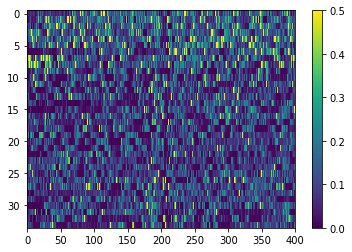

In [138]:
seconds_back=2
list_of_speed_lists=[]
for i in index:        
    if i <= seconds_back*100:
        i = seconds_back*100+1
    else:
        list_of_speed_lists.append(array[:,1][i-(seconds_back*100):i+(seconds_back*100)])
print (len( list_of_speed_lists))
fig, ax = plt.subplots()
im = ax.imshow(list_of_speed_lists, cmap=plt.get_cmap('viridis'),aspect='auto',vmin=0, vmax=.5,interpolation='nearest')
fig.colorbar(im)

## It worked!!! need to configure units. 

In [115]:
index = []
beacon_data = beacon_Day86_fs1
position_data = Day86_fs1
for i in list(np.arange(0,len(beacon_data [0]),1)):
    index.append(np.abs(np.array(beacon_data[0][i])-array[:,1]).argmin() ) #Can just exchange velocity here? 
print (index)
# for i in list(np.arange(0,len(beacon_data [0]),1)):
#     print (list(np.array(beacon_data[0][i])))

[8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333, 8333]


## Need ot fix so I can graph downsampled data since it does not match in size. 

# Maybe the comlicated approach did not work - need ot start from simple... 

8792
[0.29367504 0.03928278 0.01765206 ... 0.04904134 0.15247008 0.01672783]
25
26
20 seconds in session 86_fs1, with 50 max speed filter showing 35 beacons  all trials 


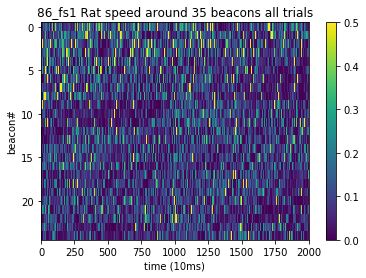

In [177]:
import numpy 
def Med_fill_Speed_before_beacon (session,position_data,beacon_data,max_speed=70 ,seconds_back=10, zero=-1,visible=all,height=False): 
    """function plots a given amount of seconds before beacon reached, takes Beacon file, position file, now with a median filter also """
    
    #main
    
    array =  gau_smoothen_resample(Day86_fs1,freguency=10,ker_width=100) 
    
    index=[]
    for i in list(np.arange(0,len(beacon_data [0]),1)):
        index.append(np.abs(np.array(beacon_data[0][i])-(array[:,0])).argmin())  
    
    # conditionals 
   
    if height== False:
        num=3
    else:
        num=2

    if visible == True:
        index = index[::2]
        eye='visible trials'
    elif visible == False:
        index = index[1::2] 
        eye = 'invisible trials'
    else: 
        index=index
        eye = 'all trials'    
    
   #Make list to graph
    
    list_of_speed_lists=[]
    for i in index:        
        if i <= seconds_back*100:
            i = seconds_back*100+1
        else:
            list_of_speed_lists.append(array[:,1][i-(seconds_back*100):i+(seconds_back*100)])
    print (i)        
    print ( list_of_speed_lists[27])
    print (len(list_of_speed_lists[1:26]))
    print (len(list_of_speed_lists[1:27]))
    #Graphing 
    
    fig, ax = plt.subplots()
    im = ax.imshow(list_of_speed_lists[1:26], cmap=plt.get_cmap('viridis'),aspect='auto',vmin = 0,  vmax=.5,interpolation='nearest')
    fig.colorbar(im)

    ax.set(xlabel='time (10ms)', ylabel='beacon#',title='%s Rat speed around %s beacons %s' %(session,len(index),eye))
  
    ax.set_alpha (alpha = .5)
    print('%s seconds in session %s, with %s max speed filter showing %s beacons  %s '% (seconds_back*2, session, max_speed,len(index),eye))
   
    plt.savefig('%s_imshow_speed_%s_sec._before_and _after_%s_beacon_%s.png'%(figures,seconds_back,session,eye), dpi = 100)
    plt.show()

Med_fill_Speed_before_beacon ('86_fs1',Day86_fs1,beacon_Day86_fs1,50,zero=-1,visible=all,height=False)


### For large values, np.math.factorial returns a long instead of an int. Arrays with long values are of dtype object as the cannot be stored using NumPy's types. You can re-convert the final result by

WeightMesh=np.array(AyMesh*AxMesh, dtype=float)
to have a proper float array.

In [ ]:
Can still rewrite function to work for allcases, then need oto cleanup - now works only for 1:26 but at 27 it is toom much 

### Includes median filter, not downsampled yet. 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[418, 5267, 5871, 7564, 8020, 12141, 12587, 19047, 23102, 23321, 34878, 36731, 37660, 37940, 39351, 51921, 52561, 53878, 60705, 61939, 64016, 64546, 65104, 73768, 74188, 74419, 76498, 79101, 80279, 93151, 94459, 99261, 102101, 104462, 105025]
107974
list_of_speed_lists: 34
20 seconds in session 86_fs1, with 50 max speed filter showing 35 beacons  all trials 


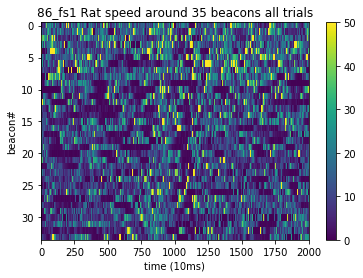

In [60]:
import numpy 
def Speed_before_beacon (session,seconds_back,position_data,beacon_data,max_speed,zero=-1,visible=all,height=False): 
    """function plots a given amount of seconds before beacon reached, takes Beacon file, position file, now with a median filter also """
    
  
    enum = list(np.arange(0,len(beacon_data [0]),1))
    index=[]
    beacon_times = np.array(beacon_data[0])
    print(enum)
    for i in enum:
        index.append(np.abs(beacon_times[i]-np.array(position_data[0])).argmin() ) #Can just exchange velocity here? 
        
    if height== False:
        num=3
    else:
        num=2
    print(index)
    
    time =0.2
    k=velocity(np.array(Day86_fs1))
    post_medfit = signal.medfilt(k[:,1], 3) # can determine the strenght of median filter here!
    median_filter = np.column_stack((k[:,0], post_medfit))
    speed_list = median_filter[:,1].tolist()
    speed_list = [element * 100 for element in speed_list]# to get to cm/s speed. 
    time = numpy.arange(-seconds_back,seconds_back,time)       
    fig, ax = plt.subplots()
    print(len(speed_list))
    
    if visible == True:
        index = index[::2]
        eye='visible trials'
    elif visible == False:
        index = index[1::2] 
        eye = 'invisible trials'
    else: 
        index=index
        eye = 'all trials'    
    
    list_of_speed_lists=[]
    for i in index:        
        if i <= seconds_back*100:
            i = seconds_back*100+1
        else:
            list_of_speed_lists.append(speed_list[i-(seconds_back*100):i+(seconds_back*100)])
            
        
    print('list_of_speed_lists:',len(list_of_speed_lists))
    array = np.array(list_of_speed_lists).reshape(len(index)+zero,seconds_back*200) # can add or delete one if indexing issue

    im = ax.imshow(array, cmap=plt.get_cmap('viridis'),aspect='auto',vmin=0, vmax=max_speed,interpolation='nearest')
    fig.colorbar(im)

    ax.set(xlabel='time (10ms)', ylabel='beacon#',
           title='%s Rat speed around %s beacons %s' %(session,len(index),eye))
    #ax.grid()
    #x_label_list = ['-5','-4','-3','-2','-1','0','1','2','3','4','5']
    #ax.set_xticklabels(x_label_list)
    ax.set_alpha (alpha = .5)
    print('%s seconds in session %s, with %s max speed filter showing %s beacons  %s '% (seconds_back*2, session, max_speed,len(index),eye))
   
    plt.savefig('%s_imshow_speed_%s_sec._before_and _after_%s_beacon_%s.png'%(figures,seconds_back,session,eye), dpi = 100)
    plt.show()

Speed_before_beacon ('86_fs1',10,Day86_fs1,beacon_Day86_fs1,50,zero=-1,visible=all,height=False)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[418, 5267, 5871, 7564, 8020, 12141, 12587, 19047, 23102, 23321, 34878, 36731, 37660, 37940, 39351, 51921, 52561, 53878, 60705, 61939, 64016, 64546, 65104, 73768, 74188, 74419, 76498, 79101, 80279, 93151, 94459, 99261, 102101, 104462, 105025]
107974
list_of_speed_lists: 17
20 seconds in session 86_fs1, with 50 max speed filter showing 18 beacons  visible trials 


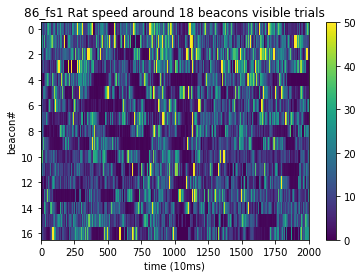

In [61]:
Speed_before_beacon ('86_fs1',10,Day86_fs1,beacon_Day86_fs1,50,zero=-1,visible=True,height=False)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[418, 5267, 5871, 7564, 8020, 12141, 12587, 19047, 23102, 23321, 34878, 36731, 37660, 37940, 39351, 51921, 52561, 53878, 60705, 61939, 64016, 64546, 65104, 73768, 74188, 74419, 76498, 79101, 80279, 93151, 94459, 99261, 102101, 104462, 105025]
107974
list_of_speed_lists: 17
20 seconds in session 86_fs1, with 50 max speed filter showing 17 beacons  invisible trials 


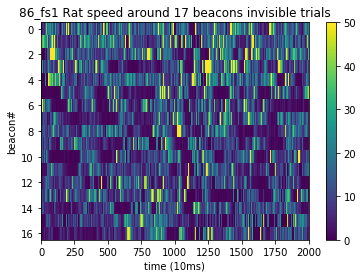

In [62]:
Speed_before_beacon ('86_fs1',10,Day86_fs1,beacon_Day86_fs1,50,zero=0,visible=False,height=False)